In [1]:
import sys

from IPython import display
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('..')
from lib.maze import Maze
from lib.cell import Cell

### Define the initial green cells

In [2]:
initial_green_cells = [
  (1, 4),
  (2, 2), (2, 4), (2, 5),
  (3, 1), (3, 2), (3, 5), (3, 6),
  (4, 2), (4, 4), (4, 5),
  (5, 4),
]

### Define the cell dynamics

In [3]:
# this is the dynamics I inferred by playing the game in the first challenge.
# dynamics are very similar to that of the second challenge, except for the
# exact threshold values of green neighbours.
def dynamics(ngreen: int, cell_type: Cell):
  if cell_type == Cell.START or cell_type == Cell.FINISH:
    return cell_type
  elif cell_type == Cell.WHITE and (1 < ngreen and ngreen < 4):
    return Cell.GREEN
  elif cell_type == Cell.GREEN and (3 < ngreen and ngreen < 7):
    return Cell.GREEN
  else:
    return Cell.WHITE

### Create the maze and show it

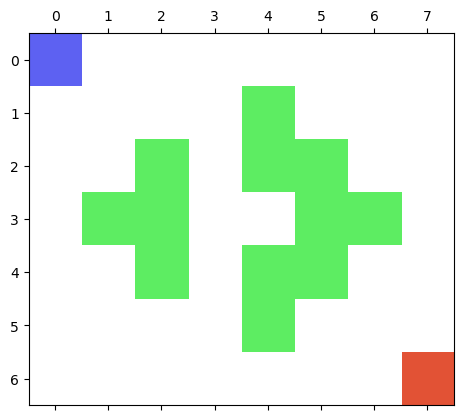

In [4]:
matrix = np.zeros(shape = (7,8), dtype = int)

matrix[0, 0] = Cell.START
matrix[-1, -1] = Cell.FINISH

for pos in initial_green_cells:
  matrix[pos] = Cell.GREEN

maze = Maze(matrix)
maze.set_dynamics(dynamics)
maze.draw()
plt.show()

### Search for a random solution

In [5]:
random_path = maze.solve_random(verbose = True, tries = 1000)

step: 1, paths: 1000, shortest distance to finish: 8.48528137423857
step: 2, paths: 1000, shortest distance to finish: 7.810249675906654
step: 3, paths: 1000, shortest distance to finish: 7.0710678118654755
step: 4, paths: 1000, shortest distance to finish: 6.708203932499369
step: 5, paths: 1000, shortest distance to finish: 5.830951894845301
step: 6, paths: 1000, shortest distance to finish: 5.0
step: 7, paths: 1000, shortest distance to finish: 4.242640687119285
step: 8, paths: 984, shortest distance to finish: 5.0
step: 9, paths: 980, shortest distance to finish: 6.324555320336759
step: 10, paths: 980, shortest distance to finish: 6.4031242374328485
step: 11, paths: 973, shortest distance to finish: 6.324555320336759
step: 12, paths: 973, shortest distance to finish: 5.385164807134504
step: 13, paths: 973, shortest distance to finish: 5.0990195135927845
step: 14, paths: 856, shortest distance to finish: 5.0
step: 15, paths: 856, shortest distance to finish: 4.0
step: 16, paths: 856,

In [6]:
if random_path:
  ani_random = maze.draw_animation(path = random_path)
  video_random = ani_random.to_html5_video()
  html_random = display.HTML(video_random)
  display.display(html_random)
  plt.close()

In [9]:
random_path

[(0, 0),
 (0, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (4, 5),
 (5, 5),
 (5, 6),
 (6, 6),
 (6, 7)]

### Find the shortest path

In [7]:
path = maze.solve(verbose = True)

step: 0, paths: 2, shortest distance to finish: 8.48528137423857
step: 1, paths: 4, shortest distance to finish: 7.810249675906654
step: 2, paths: 5, shortest distance to finish: 7.0710678118654755
step: 3, paths: 5, shortest distance to finish: 6.708203932499369
step: 4, paths: 4, shortest distance to finish: 5.830951894845301
step: 5, paths: 10, shortest distance to finish: 5.0
step: 6, paths: 9, shortest distance to finish: 4.242640687119285
step: 7, paths: 6, shortest distance to finish: 5.0
step: 8, paths: 6, shortest distance to finish: 6.324555320336759
step: 9, paths: 7, shortest distance to finish: 6.4031242374328485
step: 10, paths: 3, shortest distance to finish: 6.324555320336759
step: 11, paths: 7, shortest distance to finish: 5.385164807134504
step: 12, paths: 7, shortest distance to finish: 5.0990195135927845
step: 13, paths: 6, shortest distance to finish: 5.0
step: 14, paths: 7, shortest distance to finish: 4.0
step: 15, paths: 13, shortest distance to finish: 3.605551

In [8]:
if path:
  ani = maze.draw_animation(path = path)
  video = ani.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

In [10]:
path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (5, 0),
 (5, 1),
 (4, 1),
 (3, 1),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 4),
 (4, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7)]